In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def generate_data(n_samples, n_features, n_clusters, random_state=42):
    np.random.seed(random_state)
    X = np.zeros((n_samples, n_features))
    centers = np.random.randn(n_clusters, n_features)
    for i in range(n_samples):
        center_idx = np.random.randint(n_clusters)
        X[i] = centers[center_idx] + 0.2 * np.random.randn(n_features)
    return X

In [7]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [12]:
def kmeans(X, n_clusters, max_iterations=100):
    
    # Initialize cluster centroids randomly
    np.random.seed(0)
    indices = np.random.permutation(len(X))[:n_clusters]
    centroids = X[indices]
    
    for _ in range(max_iterations):
        
        # Assign each data point to the nearest cluster
        cluster_assignments = []
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid 
                         in centroids]
            closest_cluster = np.argmin(distances)
            cluster_assignments.append(closest_cluster)
        
        # Update cluster centroids to the mean of their assigned points
        new_centroids = [X[np.array(cluster_assignments) == k].mean(axis=0) 
                         for k in range(n_clusters)]
        
        # Check for convergence
        if all(np.array_equal(centroids[k], new_centroids[k]) 
               for k in range(n_clusters)):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_assignments

In [13]:
n_samples = 300
n_features = 2
n_clusters = 3
X = generate_data(n_samples, n_features, n_clusters)

In [14]:
cluster_centers, cluster_assignments = kmeans(X, n_clusters)

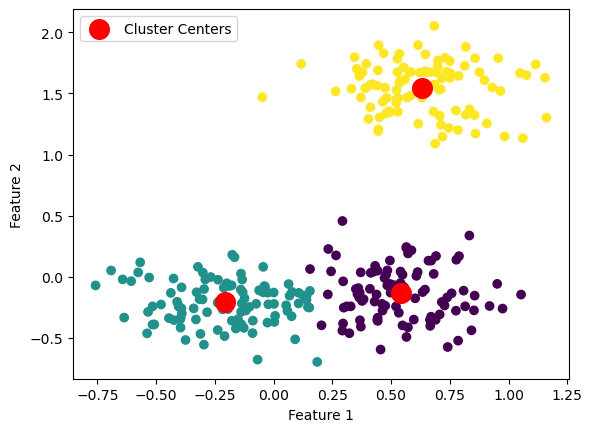

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter([c[0] for c in cluster_centers], [c[1] for c in cluster_centers], s=200, c='red', label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()